In [1]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import os

In [7]:
# Path to the folder containing the CSV files
folder_path = '/Users/qianweisoh/Desktop/Portfolio/Cyclistic Case Study/CSV file'

# Load and combine all CSV files
all_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]
dataframes = [pd.read_csv(file) for file in all_files]
cyclistic_data = pd.concat(dataframes, ignore_index=True)

# Display the first few rows
print(cyclistic_data.head())

            ride_id  rideable_type           started_at             ended_at  \
0  743252713F32516B   classic_bike  2024-04-22 19:08:21  2024-04-22 19:12:56   
1  BE90D33D2240C614  electric_bike  2024-04-11 06:19:24  2024-04-11 06:22:21   
2  D47BBDDE7C40DD61   classic_bike  2024-04-20 11:13:13  2024-04-20 11:29:31   
3  6684E760BF9EA9B5   classic_bike  2024-04-04 18:39:20  2024-04-04 18:43:06   
4  CA9EFC0D24C24A27  electric_bike  2024-04-19 19:30:20  2024-04-19 20:07:42   

           start_station_name start_station_id  \
0  Aberdeen St & Jackson Blvd            13157   
1  Aberdeen St & Jackson Blvd            13157   
2  Sheridan Rd & Montrose Ave     TA1307000107   
3  Aberdeen St & Jackson Blvd            13157   
4  Sheridan Rd & Montrose Ave     TA1307000107   

                 end_station_name end_station_id  start_lat  start_lng  \
0    Desplaines St & Jackson Blvd          15539  41.877726 -87.654787   
1    Desplaines St & Jackson Blvd          15539  41.877722 -87.654959

In [9]:
# Check for missing values
print(cyclistic_data.isnull().sum())

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1073951
start_station_id      1073951
end_station_name      1104653
end_station_id        1104653
start_lat                   0
start_lng                   0
end_lat                  7232
end_lng                  7232
member_casual               0
dtype: int64


In [11]:
#removes the columns that are not essential to the analysis 
cyclistic_data = cyclistic_data.drop(columns=['start_station_name', 'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])

In [15]:
print(cyclistic_data.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_id', 'end_station_id', 'member_casual'],
      dtype='object')


In [21]:
#Ensure proper conversion of start time and end time to datetime object
cyclistic_data['start_time'] = pd.to_datetime(cyclistic_data['started_at'])
cyclistic_data['end_time'] = pd.to_datetime(cyclistic_data['ended_at'])

In [23]:
#Extract day of the week, month, hour and ride time
cyclistic_data['ride_length'] = (cyclistic_data['end_time'] - cyclistic_data['start_time']).dt.total_seconds() / 60  # in minutes
cyclistic_data['day_of_week'] = cyclistic_data['start_time'].dt.day_name()
cyclistic_data['hour'] = cyclistic_data['start_time'].dt.hour
cyclistic_data['month'] = cyclistic_data['start_time'].dt.month

In [25]:
# Average ride length by user type
ride_length_avg = cyclistic_data.groupby('member_casual')['ride_length'].mean()
print(ride_length_avg)

member_casual
casual    25.150739
member    12.770220
Name: ride_length, dtype: float64


In [27]:
# Ride counts by user type and day of week
rides_by_day = cyclistic_data.groupby(['member_casual', 'day_of_week']).size().reset_index(name='ride_count')
print(rides_by_day)

   member_casual day_of_week  ride_count
0         casual      Friday      315864
1         casual      Monday      253599
2         casual    Saturday      445409
3         casual      Sunday      369943
4         casual    Thursday      265099
5         casual     Tuesday      232390
6         casual   Wednesday      269354
7         member      Friday      525823
8         member      Monday      534594
9         member    Saturday      479688
10        member      Sunday      417254
11        member    Thursday      570594
12        member     Tuesday      570686
13        member   Wednesday      610271


In [29]:
# Ride counts by hour of day
rides_by_hour = cyclistic_data.groupby(['member_casual', 'hour']).size().reset_index(name='ride_count')
print(rides_by_hour)

   member_casual  hour  ride_count
0         casual     0       35460
1         casual     1       23741
2         casual     2       14754
3         casual     3        8203
4         casual     4        6454
5         casual     5       12126
6         casual     6       28781
7         casual     7       53526
8         casual     8       75794
9         casual     9       76638
10        casual    10       94484
11        casual    11      120311
12        casual    12      142404
13        casual    13      148500
14        casual    14      154730
15        casual    15      170121
16        casual    16      191479
17        casual    17      203983
18        casual    18      173997
19        casual    19      128360
20        casual    20       93883
21        casual    21       78035
22        casual    22       68127
23        casual    23       47767
24        member     0       32771
25        member     1       20099
26        member     2       11400
27        member    

In [31]:
# Count of bike types by user type
bike_type_pref = cyclistic_data.groupby(['member_casual', 'rideable_type']).size().reset_index(name='ride_count')
print(bike_type_pref)

  member_casual     rideable_type  ride_count
0        casual      classic_bike      974966
1        casual     electric_bike     1091477
2        casual  electric_scooter       85215
3        member      classic_bike     1760670
4        member     electric_bike     1889118
5        member  electric_scooter       59122


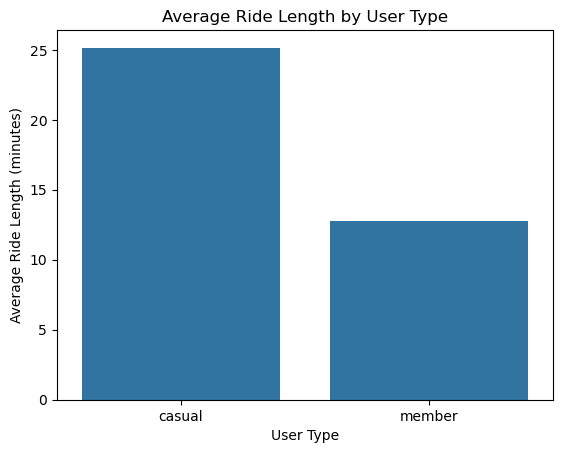

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=ride_length_avg.index, y=ride_length_avg.values)
plt.title('Average Ride Length by User Type')
plt.xlabel('User Type')
plt.ylabel('Average Ride Length (minutes)')

plt.savefig('average_ride_length_by_user_type.png', dpi=300, bbox_inches='tight')

plt.show()
plt.close() 

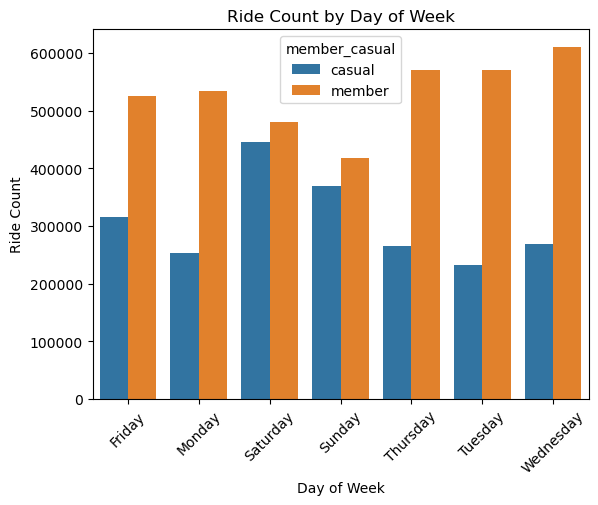

In [57]:
# Create the bar plot
sns.barplot(data=rides_by_day, x='day_of_week', y='ride_count', hue='member_casual')
plt.title('Ride Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Ride Count')
plt.xticks(rotation=45)

# Save the plot as an image file
plt.savefig('ride_count_by_day_of_the_week.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
plt.close() 

In [39]:
print(os.getcwd())

/Users/qianweisoh/Desktop/Portfolio


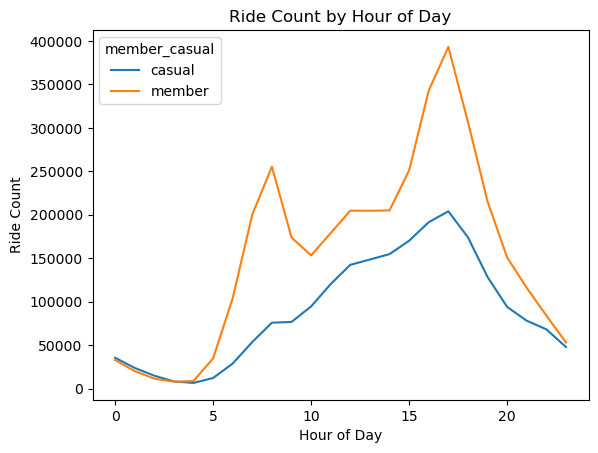

In [59]:
#Create the visualisation for the hourly ride patterns
#Create the line graph
sns.lineplot(data=rides_by_hour, x='hour', y='ride_count', hue='member_casual')
plt.title('Ride Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Ride Count')

#Save the plot as an image
plt.savefig('ride_count_by_hour_of_day.png', dpi=300, bbox_inches='tight')

#Show the plot
plt.show()
plt.close()

In [61]:
# Export to CSV
rides_by_day.to_csv('rides_by_day.csv', index=False)
rides_by_hour.to_csv('rides_by_hour.csv', index=False)
bike_type_pref.to_csv('bike_type_preferences.csv', index=False)

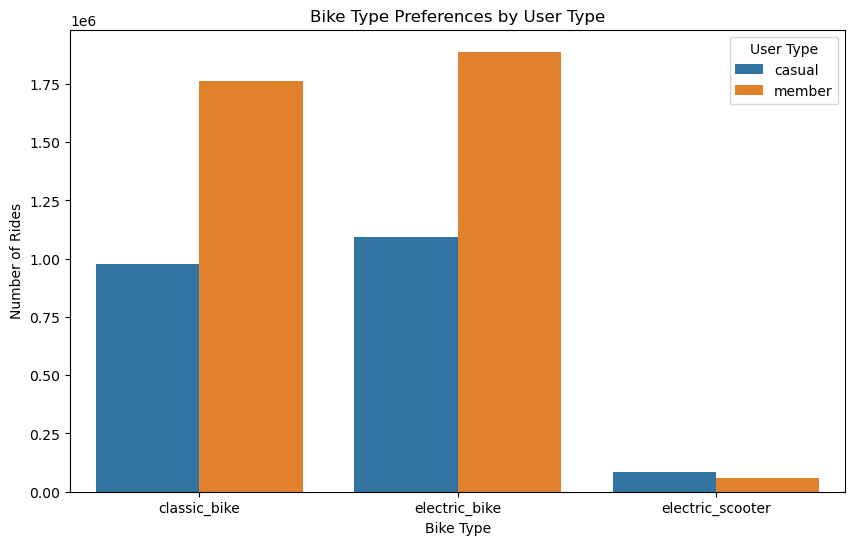

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(data=bike_type_pref, x='rideable_type', y='ride_count', hue='member_casual')
plt.title('Bike Type Preferences by User Type')
plt.xlabel('Bike Type')
plt.ylabel('Number of Rides')
plt.legend(title='User Type')

plt.savefig('bike_type_preferences.png')

plt.show()

In [119]:
monthly_data = cyclistic_data.groupby(['month', 'member_casual']).agg({
    'ride_id': 'count',
    'ride_length': 'mean'})

# Rename columns for clarity
monthly_data.rename(columns={'ride_id': 'ride_count', 'ride_length': 'avg_ride_length'}, inplace=True)
print(monthly_data)

                     ride_count  avg_ride_length
month member_casual                             
1     casual              24460        21.307195
      member             120413        13.787191
2     casual              47163        25.188601
      member             176001        12.914410
3     casual              82550        24.955966
      member             219137        11.968942
4     casual             131810        26.001338
      member             283215        12.355193
5     casual             231150        28.037023
      member             378554        13.505157
6     casual             301169        27.705548
      member             409578        13.887122
7     casual             320581        27.947569
      member             428423        13.721473
8     casual             318398        25.798698
      member             437406        13.396382
9     casual             346494        21.371681
      member             474373        12.197624
10    casual        

In [123]:
monthly_data.to_csv('monthly_data.csv', header=True)

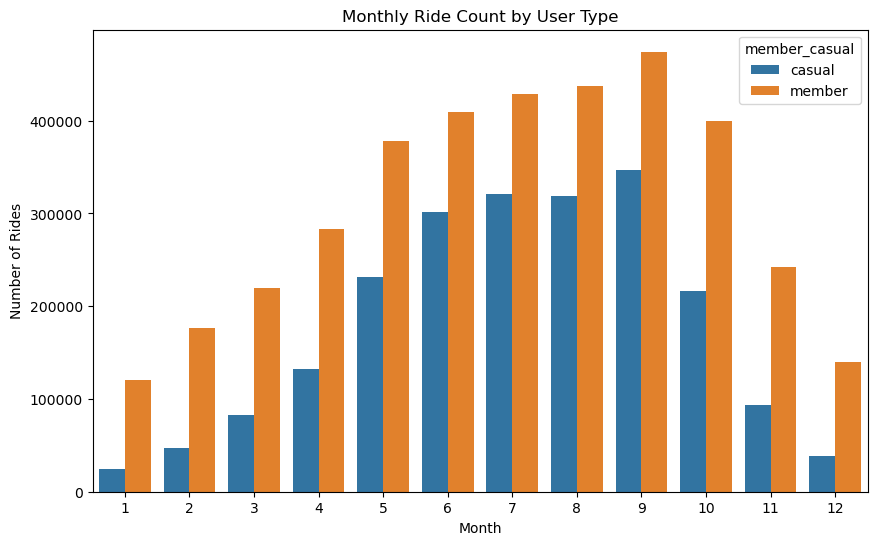

In [127]:
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_data, x='month', y='ride_count', hue='member_casual')
plt.title('Monthly Ride Count by User Type')
plt.xlabel('Month')
plt.ylabel('Number of Rides')

plt.savefig('monthly_ride_count_by_user_type.png')

plt.show()

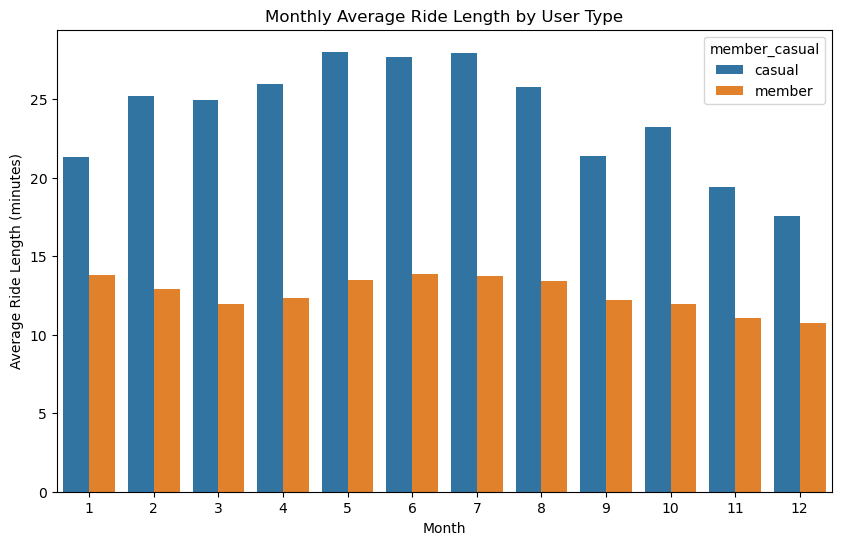

In [131]:
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_data, x='month', y='avg_ride_length', hue='member_casual')
plt.title('Monthly Average Ride Length by User Type')
plt.xlabel('Month')
plt.ylabel('Average Ride Length (minutes)')

plt.savefig('monthly average ride length by user type.png')

plt.show()